Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.4  
Zadnji put ažurirano: 22. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **2. studenog 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [44]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [45]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [46]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [47]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Accuracy:  1.0


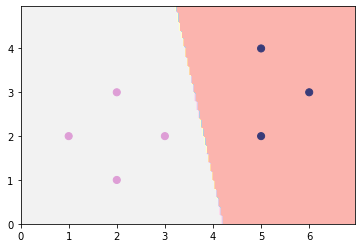

In [48]:
clf_1a = RidgeClassifier(alpha=0).fit(seven_X, seven_y)
y_pred_1a = clf_1a.predict(seven_X)

print("Accuracy: ", accuracy_score(seven_y, y_pred_1a))
plot_2d_clf_problem(seven_X, seven_y, clf_1a.predict)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

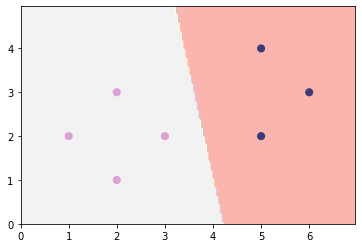

In [49]:
clf_1a_2 = LinearRegression().fit(seven_X, seven_y)
y_pred_1a_2 = clf_1a_2.predict(seven_X)

plot_2d_clf_problem(seven_X, seven_y, lambda x : clf_1a_2.predict(x) >= 0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [50]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Accuracy:  0.875


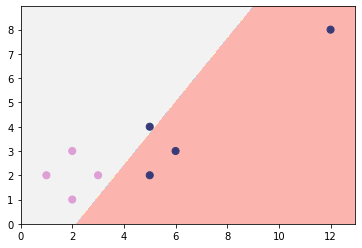

In [51]:
clf_1b = RidgeClassifier(alpha=0).fit(outlier_X, outlier_y)
y_pred_1b = clf_1b.predict(outlier_X)

print("Accuracy: ", accuracy_score(outlier_y, y_pred_1b))
plot_2d_clf_problem(outlier_X, outlier_y, clf_1b.predict)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [52]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Accuracy:  0.875


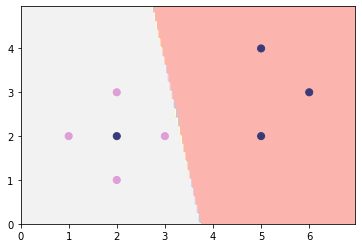

In [53]:
clf_1c = RidgeClassifier(alpha=0).fit(unsep_X, unsep_y)
y_pred_1c = clf_1c.predict(unsep_X)

print("Accuracy: ", accuracy_score(unsep_y, y_pred_1c))
plot_2d_clf_problem(unsep_X, unsep_y, clf_1c.predict)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

In [54]:
from sklearn.datasets import make_classification

X_2, y_2 = make_classification(n_features=2, n_classes=3, n_redundant=0, n_clusters_per_class=1)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

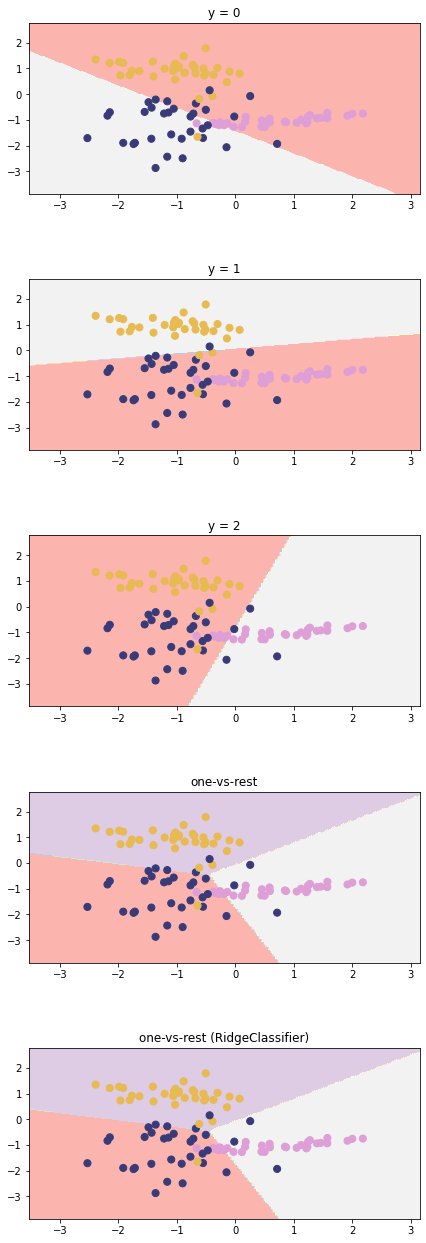

In [55]:
clf_2 = RidgeClassifier(alpha=0).fit(X_2, y_2)
y_pred_2 = clf_2.predict(X_2)
classes = np.unique(y_2)

h0 = []
h1 = []
h2 = []

for i in y_2:
    h0.append(1 if i == classes[0] else 0)
    h1.append(1 if i == classes[1] else 0)
    h2.append(1 if i == classes[2] else 0)

clf_2_0 = LinearRegression().fit(X_2, h0)
clf_2_1 = LinearRegression().fit(X_2, h1)
clf_2_2 = LinearRegression().fit(X_2, h2)

figure(figsize=(7,22))
subplots_adjust(wspace=0.5, hspace=0.5)

subplot(5, 1, 1)
title("y = 0")
plot_2d_clf_problem(X_2, y_2, lambda x : clf_2_0.predict(x) >= 0.5)

subplot(5, 1, 2)
title("y = 1")
plot_2d_clf_problem(X_2, y_2, lambda x : clf_2_1.predict(x) >= 0.5)

subplot(5, 1, 3)
title("y = 2")
plot_2d_clf_problem(X_2, y_2, lambda x : clf_2_2.predict(x) >= 0.5)

def predict(x):
    values = [clf_2_0.predict(x.reshape(1, -1)), clf_2_1.predict(x.reshape(1, -1)), clf_2_2.predict(x.reshape(1, -1))]
    return values.index(max(values))

subplot(5, 1, 4)
title("one-vs-rest")
plot_2d_clf_problem(X_2, y_2, predict)

subplot(5, 1, 5)
title("one-vs-rest (RidgeClassifier)")
plot_2d_clf_problem(X_2, y_2, clf_2.predict)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

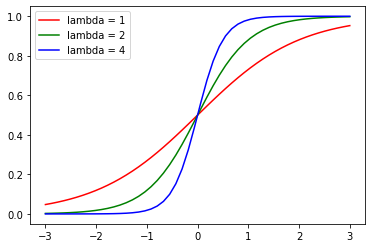

In [56]:
# Vaš kôd ovdje
import math

def sigm(alfa, x):
    return 1.0 / (1 + math.exp(-alfa*x))
    
x_3a = linspace(-3, 3)
plot(x_3a, [sigm(1, el) for el in x_3a], 'r', label='lambda = 1')
plot(x_3a, [sigm(2, el) for el in x_3a], 'g', label='lambda = 2')
plot(x_3a, [sigm(4, el) for el in x_3a], 'b', label='lambda = 4')
legend(loc='best')

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [57]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures

def lr_h(x, w):
    x_dummy = PolynomialFeatures(1).fit_transform(x.reshape(1, -1))
    return sigm(1, matmul(x_dummy, w))

def cross_entropy_error(X,y,w):
    error = 0; N = len(X);
    for i in range(N):
        error += - y[i] * log(lr_h(X[i], w)) - (1 - y[i]) * log(1 - lr_h(X[i], w))
    return (1 / N) * error
    #return error

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    N = len(X)
    w_tilda = [0 for i in range(len(X[0]) + 1)]
    w_trace = []
        
    for j in range(max_iter):
        delta_w0 = 0
        delta_w = [0 for i in range(len(X[0]))]
    
        for i in range(0, N):
            h = lr_h(X[i], w_tilda)
            delta_w0 -= h - y[i]
            delta_w -= np.dot((h - y[i]), X[i]) 
           
        error = cross_entropy_error(X, y, w_tilda)
        w_tilda[0] += eta * delta_w0
        w_tilda[1:] =  np.dot(w_tilda[1:], 1 - eta * alpha) + eta * delta_w
        if(trace):
            w_trace.append(w_tilda.copy())
        if(abs(error - cross_entropy_error(X, y, w_tilda)) < epsilon):
            break
    
    print("End. Iteration number: ", j, "\n")
    if(trace):
        return w_tilda, w_trace
    else:
        return w_tilda

### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

End. Iteration number:  946 

Pogreška unakrsne entropije:  0.13521872720206743
Težine:  [4.4544945420360165, -1.7108924201238558, 0.6841350736281353]


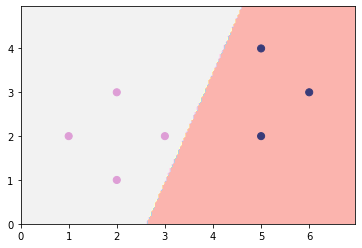

In [58]:
w_3c, trace_3c = lr_train(seven_X, seven_y, trace=True) 

plot_2d_clf_problem(seven_X, seven_y, lambda x: lr_h(x, w_3c) > 0.5)
error_3c = cross_entropy_error(seven_X, seven_y, w_3c)
print("Pogreška unakrsne entropije: ", error_3c)
print("Težine: ", w_3c)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [59]:
from sklearn.metrics import zero_one_loss

End. Iteration number:  1141 

End. Iteration number:  946 

End. Iteration number:  510 

End. Iteration number:  377 



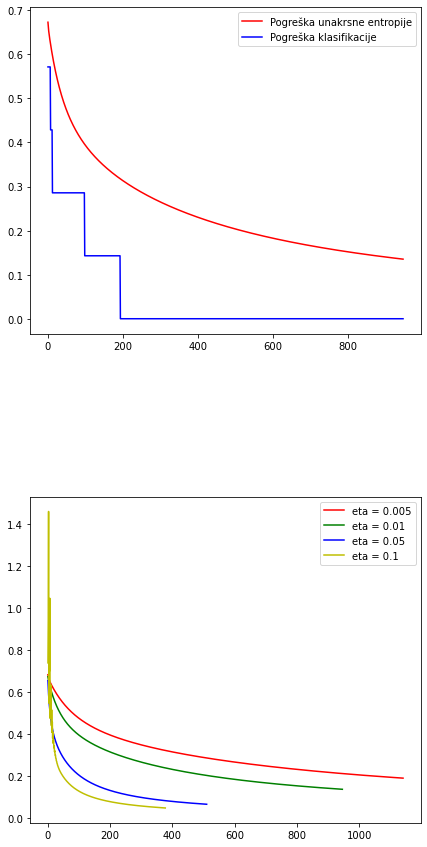

In [60]:
errors_3d = []
losses_3d = []

for i in range(len(trace_3c)):
    errors_3d.append(cross_entropy_error(seven_X, seven_y, trace_3c[i]))
    losses_3d.append(zero_one_loss(seven_y, [1 if lr_h(x, trace_3c[i]) > 0.5 else 0 for x in seven_X]))

figure(figsize=(7,15))
subplots_adjust(wspace=0.5, hspace=0.5)
subplot(2, 1, 1)
plot([i for i in range(len(trace_3c))], errors_3d, 'r', label='Pogreška unakrsne entropije')
plot([i for i in range(len(trace_3c))], losses_3d, 'b', label='Pogreška klasifikacije')
legend(loc='best')

subplot(2, 1, 2)
colors = ['r', 'g', 'b', 'y']
counter = 0
for i in [0.005, 0.01, 0.05, 0.1]:
    w_3d, trace_3d = lr_train(seven_X, seven_y, trace=True, eta=i) 
    errors_3d_2 = []
    for j in range(len(trace_3d)):
        errors_3d_2.append(cross_entropy_error(seven_X, seven_y, trace_3d[j]))
    plot([k for k in range(len(trace_3d))], errors_3d_2, colors[counter], label='eta = {}'.format(i))
    counter += 1
legend(loc='best')    


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

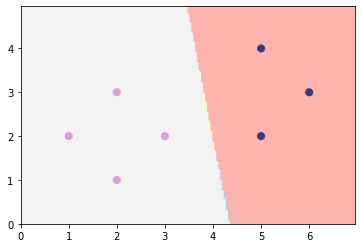

In [61]:
from sklearn.linear_model import LogisticRegression

clf_3e = LogisticRegression(max_iter=2000, C=0.01**-1).fit(seven_X, seven_y)
plot_2d_clf_problem(seven_X, seven_y, lambda x: clf_3e.predict(x))

### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

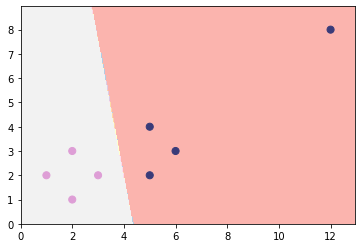

In [62]:
clf_4a = LogisticRegression(max_iter=2000, C=0.01**-1).fit(outlier_X, outlier_y)
plot_2d_clf_problem(outlier_X, outlier_y, lambda x: clf_4a.predict(x))

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

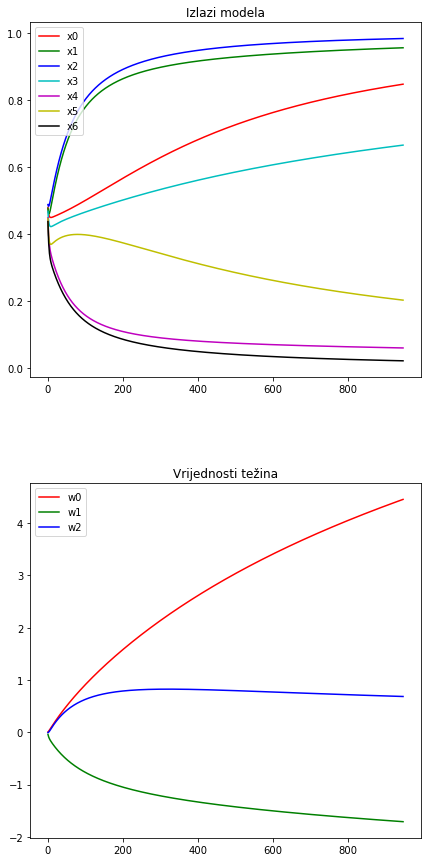

In [63]:
h_4b = np.zeros((len(seven_X), len(trace_3c)))
for i in range(len(trace_3c)):
    for j in range(len(seven_X)):
        h_4b[j][i] = lr_h(seven_X[j], trace_3c[i])
        
figure(figsize=(7,15))
subplots_adjust(wspace=0.5, hspace=0.3)
subplot(2, 1, 1)
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
title("Izlazi modela")
for i in range(len(seven_X)):
    plot([k for k in range(len(trace_3c))], h_4b[i], colors[i], label='x{}'.format(i))
legend(loc='best')  

w_4b = np.zeros((3, len(trace_3c)))
for i in range(len(trace_3c)):
    for j in range(3):
        w_4b[j][i] = trace_3c[i][j]
subplot(2, 1, 2)
colors_2 = ['r', 'g', 'b']
title("Vrijednosti težina")
for i in range(3):
    plot([k for k in range(len(trace_3c))], w_4b[i], colors_2[i], label='w{}'.format(i))
legend(loc='best')    


### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

End. Iteration number:  453 



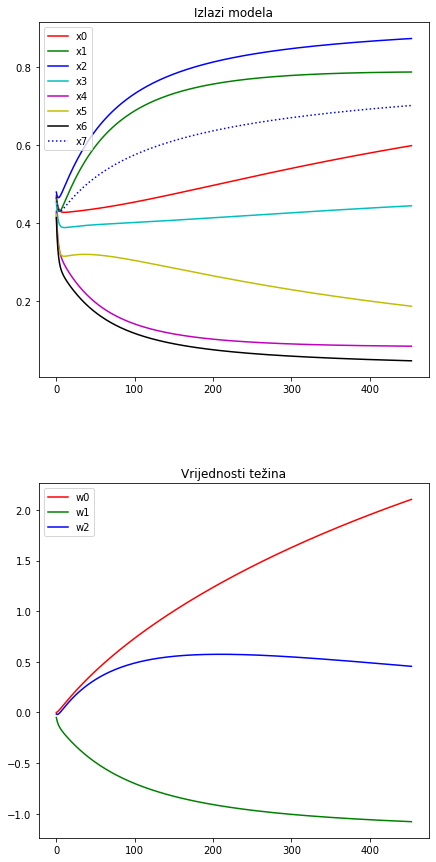

In [64]:
w_4c, trace_4c = lr_train(unsep_X, unsep_y, trace=True) 
h_4c = np.zeros((len(unsep_X), len(trace_4c)))
for i in range(len(trace_4c)):
    for j in range(len(unsep_X)):
        h_4c[j][i] = lr_h(unsep_X[j], trace_4c[i])
        
figure(figsize=(7,15))
subplots_adjust(wspace=0.5, hspace=0.3)
subplot(2, 1, 1)
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'b:']
title("Izlazi modela")
for i in range(len(unsep_X)):
    plot([k for k in range(len(trace_4c))], h_4c[i], colors[i], label='x{}'.format(i))
legend(loc='best')  

w_4c_2 = np.zeros((3, len(trace_4c)))
for i in range(len(trace_4c)):
    for j in range(3):
        w_4c_2[j][i] = trace_4c[i][j]
subplot(2, 1, 2)
colors_2 = ['r', 'g', 'b']
title("Vrijednosti težina")
for i in range(3):
    plot([k for k in range(len(trace_4c))], w_4c_2[i], colors_2[i], label='w{}'.format(i))
legend(loc='best')    

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [65]:
from numpy.linalg import norm

End. Iteration number:  946 

End. Iteration number:  803 

End. Iteration number:  404 

End. Iteration number:  3 

End. Iteration number:  946 

End. Iteration number:  803 

End. Iteration number:  404 

End. Iteration number:  3 



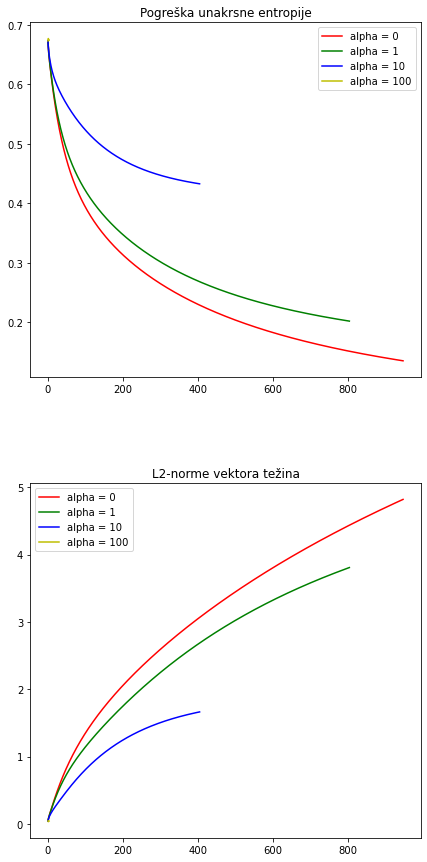

In [66]:
figure(figsize=(7,15))
subplots_adjust(wspace=0.5, hspace=0.3)
subplot(2, 1, 1)
title("Pogreška unakrsne entropije")
colors = ['r', 'g', 'b', 'y']
counter = 0
for i in [0, 1, 10, 100]:
    w_5, trace_5 = lr_train(seven_X, seven_y, trace=True, alpha=i) 
    errors_5 = []
    norms_5 = []
    for j in range(len(trace_5)):
        errors_5.append(cross_entropy_error(seven_X, seven_y, trace_5[j]))
    plot([k for k in range(len(trace_5))], errors_5, colors[counter], label='alpha = {}'.format(i))
    counter += 1
legend(loc='best')  

subplot(2, 1, 2)
title("L2-norme vektora težina")
counter = 0
for i in [0, 1, 10, 100]:
    w_5, trace_5 = lr_train(seven_X, seven_y, trace=True, alpha=i) 
    norms_5 = []
    for j in range(len(trace_5)):
        norms_5.append(norm(trace_5[j]))
    plot([k for k in range(len(trace_5))], norms_5, colors[counter], label='alpha = {}'.format(i))
    counter += 1
legend(loc='best')  

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [67]:
from sklearn.preprocessing import PolynomialFeatures

#plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

In [1]:
from sklearn.datasets import make_classification

X_6, y_6 = make_classification(n_samples=100, n_features=2, n_clusters_per_class=2, n_informative=2, n_redundant=0)

figure(figsize=(7,12))
subplots_adjust(wspace=0.5, hspace=0.3)
subplot(2, 1, 1)
title("d = 2")
clf_6_2 = LogisticRegression().fit(PolynomialFeatures(2).fit_transform(X_6), y_6)
plot_2d_clf_problem(X_6, y_6, lambda x : clf_6_2.predict(PolynomialFeatures(2).fit_transform(x)))

subplot(2, 1, 2)
title("d = 3")
clf_6_3 = LogisticRegression().fit(PolynomialFeatures(3).fit_transform(X_6), y_6)
plot_2d_clf_problem(X_6, y_6, lambda x : clf_6_3.predict(PolynomialFeatures(3).fit_transform(x)))

[0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0
 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1
 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0]


NameError: name 'figure' is not defined

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?